In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
VOCAB_SIZE = 10000
MAX_LEN = 200
EMBEDDING_DIM = 128
BATCH_SIZE = 64
EPOCHS = 5
RNN_TYPE = 'LSTM'

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)

print(f"Размер обучающей выборки: {len(x_train)}")
print(f"Размер тестовой выборки: {len(x_test)}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Размер обучающей выборки: 25000
Размер тестовой выборки: 25000


In [ ]:
x_train = pad_sequences(x_train, maxlen=MAX_LEN, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=MAX_LEN, padding='post', truncating='post')

In [ ]:
def build_model(rnn_type='SimpleRNN'):
    model = Sequential()

    model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN))

    if rnn_type == 'SimpleRNN':
        model.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2))
    elif rnn_type == 'LSTM':
        model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    elif rnn_type == 'GRU':
        model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    return model

model = build_model(RNN_TYPE)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 214s 656ms/step - accuracy: 0.5205 - loss: 0.6922 - val_accuracy: 0.6046 - val_loss: 0.6601
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 216s 690ms/step - accuracy: 0.5849 - loss: 0.6651 - val_accuracy: 0.6228 - val_loss: 0.6519
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 261s 685ms/step - accuracy: 0.6605 - loss: 0.6142 - val_accuracy: 0.6466 - val_loss: 0.6201
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 215s 686ms/step - accuracy: 0.7313 - loss: 0.5299 - val_accuracy: 0.7708 - val_loss: 0.5130
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 261s 684ms/step - accuracy: 0.8369 - loss: 0.3999 - val_accuracy: 0.7240 - val_loss: 0.5642


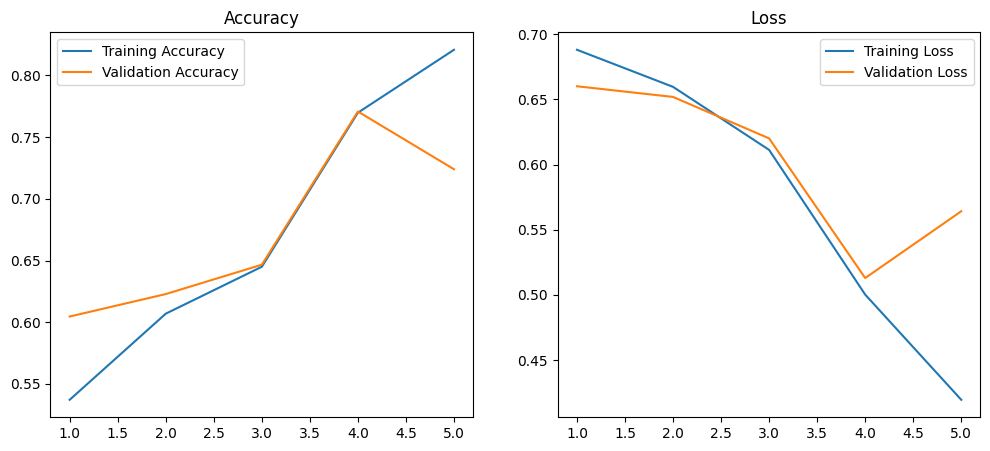

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step


In [ ]:
print("\nОтчет о классификации (Test set):")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Отчет о классификации (Test set):
              precision    recall  f1-score   support

    Negative       0.68      0.83      0.75     12500
    Positive       0.78      0.60      0.68     12500

    accuracy                           0.72     25000
   macro avg       0.73      0.72      0.71     25000
weighted avg       0.73      0.72      0.71     25000



In [ ]:
word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = '<PAD>'
reverse_word_index[1] = '<START>'
reverse_word_index[2] = '<UNK>'

def decode_review(text_seq):
    return ' '.join([reverse_word_index.get(i, '?') for i in text_seq])

errors = np.where(y_pred.flatten() != y_test)[0]
print(f"Всего ошибок: {len(errors)}")

for i in errors[:3]:
    print(f"\n--- Пример ошибки (Index {i}) ---")
    print(f"Реальный класс: {'Positive' if y_test[i]==1 else 'Negative'}")
    print(f"Предсказание: {'Positive' if y_pred[i][0]==1 else 'Negative'} (Prob: {y_pred_prob[i][0]:.4f})")
    print("Текст отзыва (обрезанный):")
    print(decode_review(x_test[i]).replace('<PAD>', '').strip())

Всего ошибок: 7093

--- Пример ошибки (Index 2) ---
Реальный класс: Positive
Предсказание: Negative (Prob: 0.2367)
Текст отзыва (обрезанный):
<START> many animation buffs consider <UNK> <UNK> the great forgotten genius of one special branch of the art puppet animation which he invented almost single <UNK> and as it happened almost accidentally as a young man <UNK> was more interested in <UNK> than the cinema but his <UNK> attempt to film two <UNK> <UNK> fighting led to an unexpected breakthrough in film making when he realized he could <UNK> movement by <UNK> beetle <UNK> and <UNK> them one frame at a time this discovery led to the production of amazingly elaborate classic short the <UNK> revenge which he made in russia in <UNK> at a time when motion picture animation of all sorts was in its <UNK> br br the political <UNK> of the russian revolution caused <UNK> to move to paris where one of his first productions <UNK> was a dark political satire <UNK> known as <UNK> or the <UNK> who wa

Загрузка данных IMDB...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Размер обучающей выборки: 25000
Размер тестовой выборки: 25000
Размерность входных данных после паддинга: (25000, 200)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4983 - loss: 0.6936 - val_accuracy: 0.5756 - val_loss: 0.6839
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5772 - loss: 0.6802 - val_accuracy: 0.5204 - val_loss: 0.6897
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5707 - loss: 0.6743 - val_accuracy: 0.5766 - val_loss: 0.6732
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6455 - loss: 0.6252 - val_accuracy: 0.6670 - val_loss: 0.6568
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7234 - loss: 0.5724 - val_accuracy: 0.5080 - val_loss: 0.7423
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

Отчет о классификации:
              precision    recall  f1-score   support

    Negative       0.92      0.03      0.06     12500
    Positive       0.51      1.00      0.67     12500

    accuracy                           0.51     25000
   macro avg       0.71      0.51      0.36     25000
weighted avg       0.7

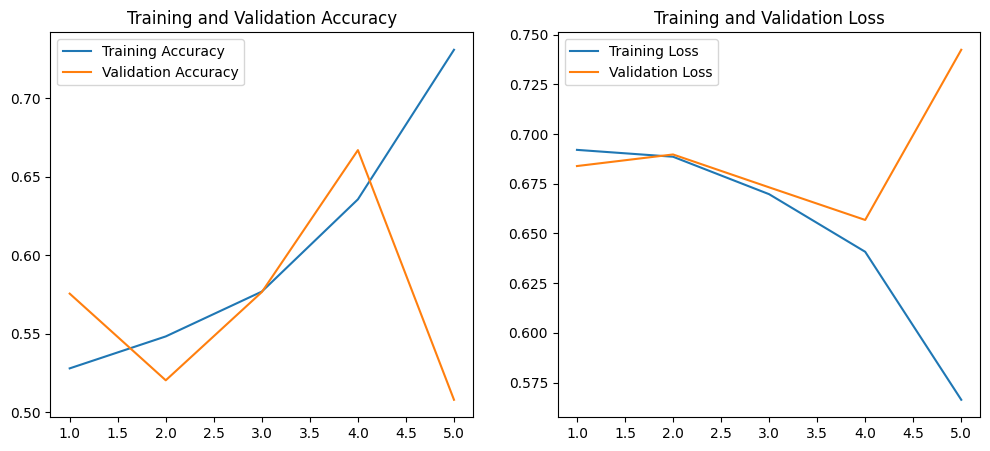

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Примеры неверной классификации (всего ошибок: 12172):

Индекс: 0
Истинный класс: Negative
Предсказанный: Positive
Вероятность: 0.5528
Текст (первые 50 слов): ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you...

Индекс: 7
Истинный класс: Negative
Предсказанный: Positive
Вероятность: 0.5837
Текст (первые 50 слов): ? the ? richard ? dog is ? to ? joan fontaine dog however when ? bing crosby arrives in town to sell a record player to the emperor his dog is attacked by ? dog after a revenge attack where ? is ? from town a ? insists that ? dog must confront dog so that she can overcome her ? fears this is arrange...

Индекс: 8
Истинный класс: Negative
Предсказанный: Positive
Вероятность: 0.5543


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Загрузка и предобработка данных ---

# Гиперпараметры данных
VOCAB_SIZE = 10000  # Количество самых частых слов для использования
MAX_LEN = 200       # Фиксированная длина последовательности (обрезка или паддинг)

print("Загрузка данных IMDB...")
# IMDB в Keras уже токенизирован (слова заменены на индексы)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)

print(f"Размер обучающей выборки: {len(x_train)}")
print(f"Размер тестовой выборки: {len(x_test)}")

# Преобразуем последовательности к одной длине (padding/truncating)
x_train = pad_sequences(x_train, maxlen=MAX_LEN, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"Размерность входных данных после паддинга: {x_train.shape}")

# --- 2. Создание модели RNN ---

def build_model(model_type='LSTM', embedding_dim=128):
    model = Sequential()

    # Слой эмбеддингов: превращает индексы слов в плотные векторы
    model.add(Embedding(input_dim=VOCAB_SIZE,
                        output_dim=embedding_dim,
                        input_length=MAX_LEN))

    # Выбор типа рекуррентного слоя
    if model_type == 'SimpleRNN':
        # SimpleRNN часто страдает от исчезающего градиента на длинных последовательностях
        model.add(SimpleRNN(64, return_sequences=False))
    elif model_type == 'GRU':
        model.add(GRU(64, return_sequences=False))
    else: # LSTM по умолчанию
        model.add(LSTM(64, return_sequences=False))

    # Регуляризация
    model.add(Dropout(0.5))

    # Выходной слой для бинарной классификации
    model.add(Dense(1, activation='sigmoid'))

    # Компиляция
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Создаем модель (здесь можно поменять на 'SimpleRNN' или 'GRU' для экспериментов)
model_type = 'LSTM'
model = build_model(model_type=model_type)
model.summary()

# --- 3. Обучение модели ---

BATCH_SIZE = 64
EPOCHS = 5

history = model.fit(x_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2, # 20% данных на валидацию
                    verbose=1)

# --- 4. Оценка качества ---

# Предсказание на тестовых данных
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Метрики: Accuracy, Precision, Recall, F1
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Построение графиков
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # График потерь
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

plot_history(history)

# --- Анализ ошибок ---

# Функция для декодирования отзыва обратно в текст
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(text_seq):
    # Индексы смещены на 3, так как 0, 1, 2 зарезервированы (padding, start, unknown)
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_seq])

# Находим индексы неверных предсказаний
mistakes = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]

print(f"\nПримеры неверной классификации (всего ошибок: {len(mistakes)}):")
for i in mistakes[:3]: # Показать 3 примера
    print(f"\nИндекс: {i}")
    print(f"Истинный класс: {'Positive' if y_test[i]==1 else 'Negative'}")
    print(f"Предсказанный: {'Positive' if y_pred[i]==1 else 'Negative'}")
    print(f"Вероятность: {y_pred_prob[i][0]:.4f}")
    print(f"Текст (первые 50 слов): {decode_review(x_test[i])[:300]}...")